## EE 551 PROJECT  

In [1]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pylab import rcParams
import statsmodels.api as sm
import statsmodels.formula.api as sf

In [2]:
dir_name='C:/New_partition/Project_Simon_n_Schuster/'
df_m1=pd.read_csv(dir_name+'sample_data.csv')

In [3]:
df_m1.head()

,entity,formattype,fromdate,titlecount,titles,todate,author,amazontotalreviews,minappleprice,amazontotalrevenue,...,lumpedpreorderrevenue,amazonsoldunits,amazonpreordersubscriptionrevenue,preordersubscriptionunits,amazonpreordersalesrevenue,maxappleprice,pagelength,pricewassetbypublisher,barnesandnobledistributor,appledistributor
0,Alone in the dark,print,20170418,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170419,Frith Banbury,306.0,0,0,...,0,6,0,0,0,0,NaN,NaN,NaN,NaN
1,Alone in the dark,print,20170419,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170420,Frith Banbury,306.0,0,702,...,0,7,0,0,0,0,NaN,NaN,NaN,NaN
2,Alone in the dark,print,20170420,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170421,Frith Banbury,306.0,0,4914,...,0,7,0,0,0,0,NaN,NaN,NaN,NaN
3,Alone in the dark,print,20170421,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170422,Frith Banbury,306.0,0,4212,...,0,6,0,0,0,0,NaN,NaN,NaN,NaN
4,Alone in the dark,print,20170422,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170423,Frith Banbury,306.0,0,702,...,0,1,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df_m1.shape

(6539, 106)

In [5]:
df_m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6539 entries, 0 to 6538
Columns: 106 entries, entity to appledistributor
dtypes: float64(4), int64(91), object(11)
memory usage: 5.3+ MB


In [6]:
df_m1.describe()

,fromdate,titlecount,todate,amazontotalreviews,minappleprice,amazontotalrevenue,accruedpreordersoldunits,amazonlumpedpreordersubscriptionrevenue,preordersalesrevenue,foundatamazon,...,preorderrevenue,pubtrackreported,lumpedpreorderrevenue,amazonsoldunits,amazonpreordersubscriptionrevenue,preordersubscriptionunits,amazonpreordersalesrevenue,maxappleprice,pagelength,pricewassetbypublisher
count,6.539000e+03,6539.000000,6.539000e+03,6522.000000,6539.000000,6539.000000,6539.000000,6539.0,6539.000000,6539.000000,...,6539.000000,6539.000000,6539.000000,6539.000000,6539.0,6539.0,6539.000000,6539.000000,2558.000000,1531.0
mean,2.018078e+07,1.599174,2.018080e+07,242.896044,118.859459,18074.906866,0.235204,0.0,155.503288,0.998165,...,155.503288,0.984095,155.503288,17.666004,0.0,0.0,155.503288,118.859459,336.532447,1.0
std,7.319859e+03,0.748654,7.321285e+03,57.042772,323.464108,30999.078107,2.776806,0.0,8769.366153,0.042803,...,8769.366153,0.125116,8769.366153,36.272170,0.0,0.0,8769.366153,323.464108,42.531144,0.0
min,2.017040e+07,1.000000,2.017040e+07,120.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,305.000000,1.0
25%,2.017121e+07,1.000000,2.017121e+07,200.000000,0.000000,1998.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,320.000000,1.0
50%,2.018071e+07,1.000000,2.018071e+07,250.000000,0.000000,7191.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,1.000000,0.000000,6.000000,0.0,0.0,0.000000,0.000000,321.000000,1.0
75%,2.019013e+07,2.000000,2.019013e+07,283.000000,0.000000,17982.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,1.000000,0.000000,13.000000,0.0,0.0,0.000000,0.000000,321.000000,1.0
max,2.019083e+07,4.000000,2.019083e+07,331.000000,999.000000,571692.000000,82.000000,0.0,501420.000000,1.000000,...,501420.000000,1.000000,501420.000000,781.000000,0.0,0.0,501420.000000,999.000000,496.000000,1.0


### DATA CLEANING

29 columns are columns are found to be all zeros. These columns mostly contain preorder subscription revenue ane units of different brands. As these columns are not providing sufficient information they can be dropped. 

In [8]:
zero_cols = [ col for col, is_zero in ((df_m1 == 0).sum() == df_m1.shape[0]).items() if is_zero ]
df_m1.drop(zero_cols, axis=1, inplace=True)

In [9]:
df_m1.drop(columns=['titles'],inplace=True)

In [10]:
df_m1.shape

(6539, 76)

In [11]:
#finding umique values 
uniqueValues = df_m1.nunique()

In [12]:
uniqueValues.tail()

maxappleprice                2
pagelength                   6
pricewassetbypublisher       1
barnesandnobledistributor    1
appledistributor             2
dtype: int64

In [13]:
#finding umique values with Nan
uniqueValues = df_m1.nunique(dropna=False)

In [14]:
uniqueValues.tail()

maxappleprice                2
pagelength                   7
pricewassetbypublisher       2
barnesandnobledistributor    2
appledistributor             3
dtype: int64

Since the output of uniqueValues when we consider is nan values is different. For exampel if we consider column 'appledistributor'
we can see without Nconsiderinbg nan uniquevalues is 2 but when we consider Nan values appledistributor is 3. So now find out 
the Nan values in dataframe

In [15]:
#Total number of nan values
df_m1.isnull().sum().sum()


19615

In [16]:
#number of nan values in each column
df_m1.isnull().sum()

entity                          0
formattype                      0
fromdate                        0
titlecount                      0
todate                          0
                             ... 
maxappleprice                   0
pagelength                   3981
pricewassetbypublisher       5008
barnesandnobledistributor    4804
appledistributor             5783
Length: 76, dtype: int64

As there are so many column let just find the columns that have missing values.

In [17]:
for column in df_m1:
    if df_m1[column].isnull().any():
       print('{0} has {1} null values'.format(column, df_m1[column].isnull().sum()))

amazontotalreviews has 17 null values
amazonaveragerating has 16 null values
amazoncategories has 5 null values
formats has 1 null values
pagelength has 3981 null values
pricewassetbypublisher has 5008 null values
barnesandnobledistributor has 4804 null values
appledistributor has 5783 null values


#### Visualising missing data

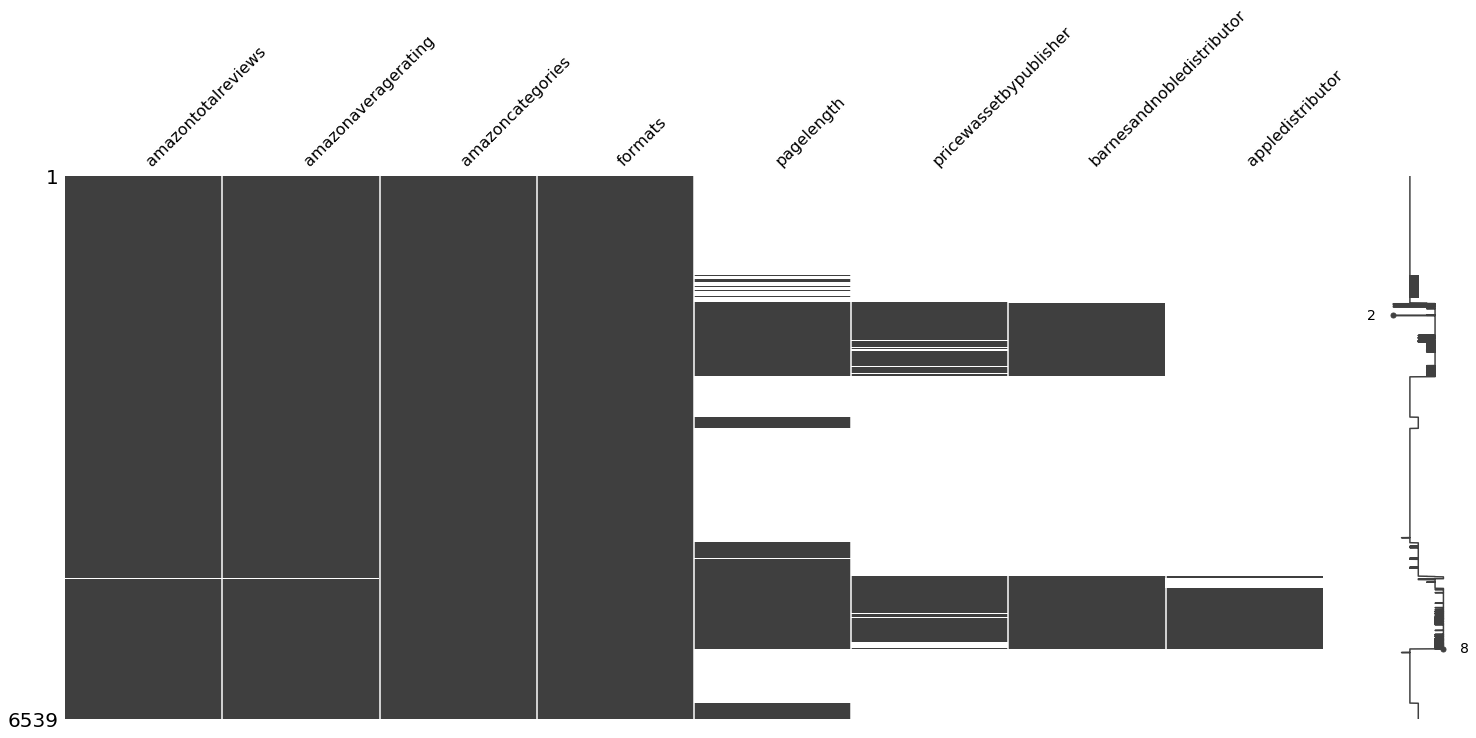

In [18]:
import missingno
missingdata_df = df_m1.columns[df_m1.isnull().any()].tolist()
missingno.matrix(df_m1[missingdata_df])

This graph shows us the patterns of missing values. Amazontotalreviews adn amazonaverage ratings have somehwat simialr pattern.

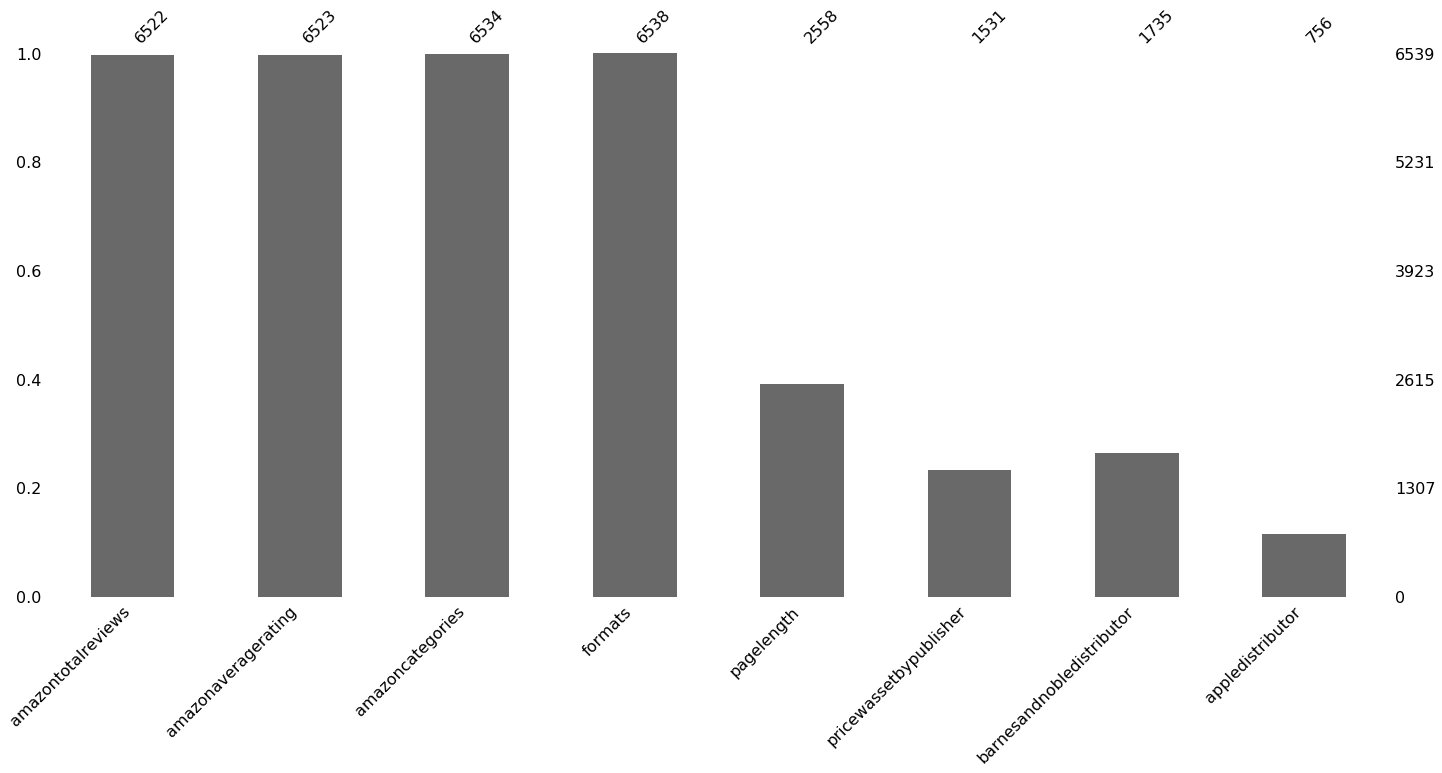

In [19]:
missingno.bar(df_m1[missingdata_df])

This plot shows the number of nan values in the columns. 'Appledistributor' contains the most missing values then 
'pricesetbypublisher' follwoed by 'barnesandnobledistributor' and so on. 

#### Replacing Missing Data

For missing format I will find the most popular/commom format type and replace it with that. 

In [20]:
df_m1['formats'].value_counts().idxmax()

'Hardcover'

In [21]:
print(list(np.where(df_m1['formats'].isnull())[0]))
val=df_m1['formats'].value_counts().idxmax()

[5735]


In [22]:
#df_m1["formats"].replace("No College", inplace=) 
df_m1["formats"].fillna(df_m1['formats'].value_counts().idxmax(), inplace = True) 

In [23]:
#print(list(np.where(df_m1["formats"].isnull())[0]))

In [24]:
#print(list(np.where(df_m1['amazonaveragerating'].isnull())[0]))

In [25]:
#df_m1["amazonaveragerating"].fillna(df_m1['amazonaveragerating'].value_counts().idxmax(), inplace = True) 

In [26]:
df1=df_m1.iloc[:3040,:]
df2=df_m1.iloc[3040:,:]


I have sliced the dataset because there are 2 differnt entities(books) we are dealing with and in order to fill missing values
I think it is better to deal with them separately. For column=amazonaveragerating I would fill with mean value. Also, for amazontotalreviews I will replace with mean value of entire column. 

In [27]:
for column in df1:
    if df1[column].isnull().any():
       print('{0} has {1} null values'.format(column, df1[column].isnull().sum()))

amazontotalreviews has 5 null values
amazonaveragerating has 5 null values
amazoncategories has 5 null values
pagelength has 1938 null values
pricewassetbypublisher has 2253 null values
barnesandnobledistributor has 2172 null values
appledistributor has 3040 null values


In [30]:
df1["amazonaveragerating"].fillna(df1['amazonaveragerating'].mean(), inplace = True) 
df2["amazonaveragerating"].fillna(df2['amazonaveragerating'].mean(), inplace = True) 

In [31]:
df1["amazontotalreviews"].fillna(df1['amazontotalreviews'].mean(), inplace = True) 
df2["amazontotalreviews"].fillna(df2['amazontotalreviews'].mean(), inplace = True) 

In [32]:
#print(list(np.where(df1['amazontotalreviews'].isnull())[0]))

In [33]:
df1["amazoncategories"].fillna(df1['amazoncategories'].value_counts().idxmax(), inplace = True) 

In [30]:
#print(list(np.where(df1['amazoncategories'].isnull())[0]))

Right now I am leaving other column. The reason is I might not need them. The remaining 4 columns are entirely nan for df1 which corresponds to entity/book 1. If I do I would use a similar technique to replace Nan values. 

In [31]:
#df1.fillna(0,inplace=True)
#df1.isnull().sum()

In [32]:
for column in df_m1:
    if df_m1[column].isnull().any():
       print('{0} has {1} null values'.format(column, df_m1[column].isnull().sum()))

pagelength has 3981 null values
pricewassetbypublisher has 5008 null values
barnesandnobledistributor has 4804 null values
appledistributor has 5783 null values


## EXPOLARATORY DATA ANALYSIS

If I manually look at the dataframe I made the following observation:
    
1. They are two entities i.e two books.
2. Data is time series
3. Data is repetitive.
4. Some columns even appear to be exactly same. For eg:
foundatamazon and bookscnareported and aaprereported and puttrackreported all seems equal. Simialry minamazonprice is equal to minlistprice


In [33]:
uniqueValues['entity']
df_m1['entity'].value_counts()

The Walking Dead     3499
Alone in the dark    3040
Name: entity, dtype: int64

In [34]:
uniqueValues['author']
df_m1['author'].value_counts()

Matthew Murdock    3499
Frith Banbury      3040
Name: author, dtype: int64

In [35]:
uniqueValues['formattype']
df_m1['formattype'].value_counts()

print    3310
ebook    1761
audio    1468
Name: formattype, dtype: int64

In [36]:
uniqueValues['publishertype']

2

In [37]:
uniqueValues['publisherparent']

3

In [38]:
 df_m1["fromdate"]=pd.to_datetime(df_m1["fromdate"], format="%Y%m%d")

In [39]:
df_m1['todate']=pd.to_datetime(df_m1['todate'], format="%Y%m%d")

In [40]:
#df_m1.head(3)

In [41]:
#df_m1.groupby(["entity","formattype","formats","todate"])['totalrevenue'].sum().plot(legend=True)

In [42]:
df_m1.groupby(['entity','formattype','formats'])['totalrevenue'].count()

entity             formattype  formats                             
Alone in the dark  audio       Audible                                  19
                               Audible Audiobook                       299
                               Audible Book                             12
                               Audiobook                               291
                   ebook       Kindle Edition                           19
                               Kindle Edition,NOOK Book                863
                               NOOK Book                                 5
                   print       Audio CD                                789
                               Hardcover                               248
                               Mass Market Paperback                   477
                               Paperback                                18
The Walking Dead   audio       Audible                                  27
                               A

In the above step I have grouped the data according by entity, formattype, formats, and todate. It is showing me the total 
number of data point with respect to the grouping of data. For eg; book= The Walking Dead, Formattype=Audio, format="Audible"
has 27 records.

In [92]:
# #group_entity=df_m1.groupby(['entity'])['totalrevenue'].sum().plot(kind='bar',x='entity',color=col, legend=True)
# col=('r','b')
# lab=(('a'),('b'))
# #lab=('ab','bc')
# #plt.show()
# # group_entity=df_m1.groupby(['entity'])['totalrevenue'].sum()
# group_entity.index[0]
# group_entity.index[0]
# group_entity.plot(kind='bar',label=lab,color=col,legend='True')


In [75]:
df_grouped=df_m1.groupby(['entity','formattype','formats'], as_index=False)['totalrevenue'].count()


In [76]:
df_grouped

,entity,formattype,formats,totalrevenue
0,Alone in the dark,audio,Audible,19
1,Alone in the dark,audio,Audible Audiobook,299
2,Alone in the dark,audio,Audible Book,12
3,Alone in the dark,audio,Audiobook,291
4,Alone in the dark,ebook,Kindle Edition,19
5,Alone in the dark,ebook,"Kindle Edition,NOOK Book",863
6,Alone in the dark,ebook,NOOK Book,5
7,Alone in the dark,print,Audio CD,789
8,Alone in the dark,print,Hardcover,248
9,Alone in the dark,print,Mass Market Paperback,477


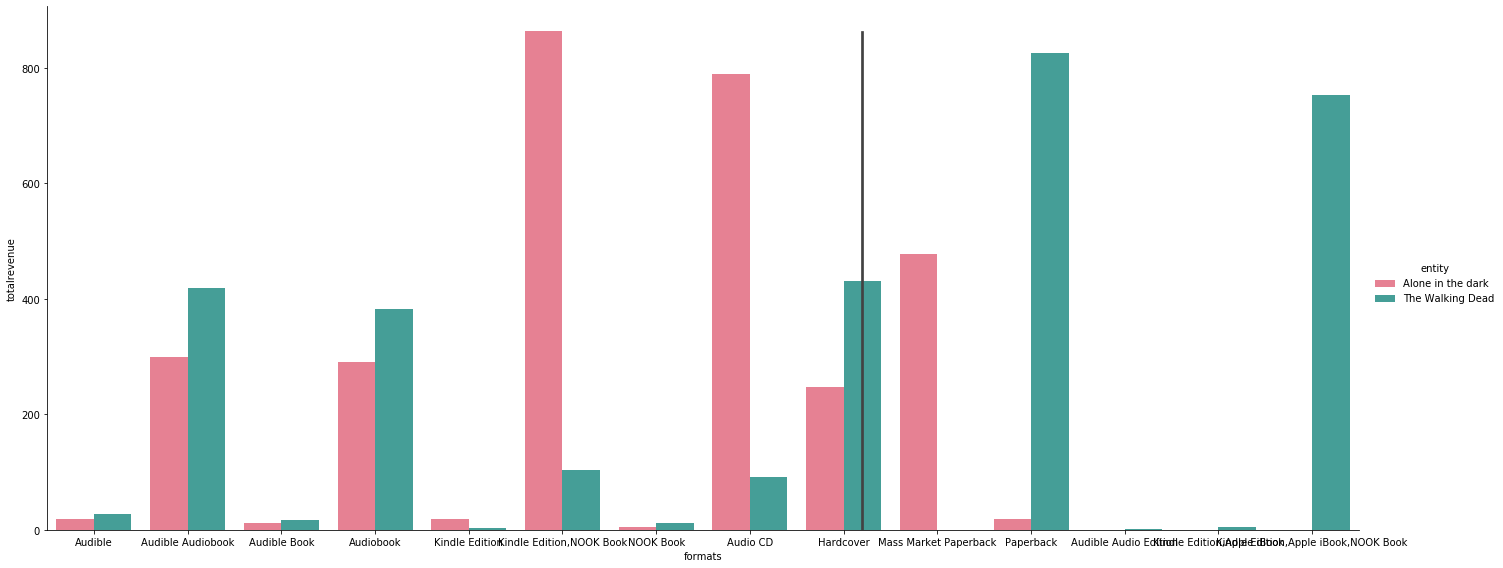

In [77]:

plt_entity_rev = sns.catplot("formats", "totalrevenue", data =df_grouped, hue="entity",
                  kind="bar",palette="husl",height=8,aspect=2.4)

The plot above shows that the highest entity sold was in Kindle Edition and was Alone in the dark.

In [93]:
df_grouped=df_m1.groupby(['entity','fromdate','todate','formattype', 'formats']).agg( totalreviews=pd.NamedAgg(column='amazontotalreviews', aggfunc=sum))


In [94]:
df_grouped.reset_index(inplace=True)

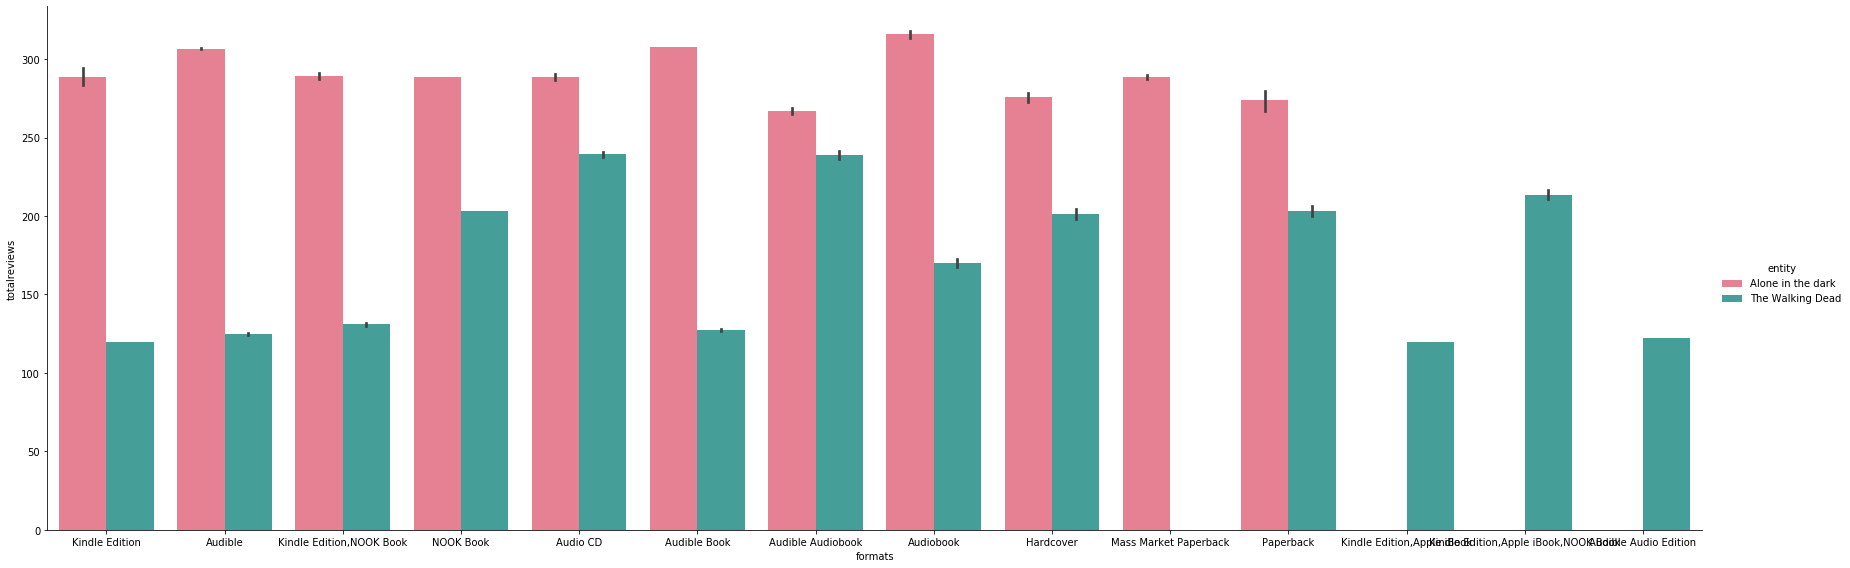

In [95]:
plt_format_rev = sns.catplot("formats", "totalreviews", data =df_grouped, hue="entity",
                  kind="bar",palette="husl",height=8,aspect=3)

The above plot shows a relationship of formats of 2 entities and total reviews. I have observed the highest reviews was gotten by Alone in the dark for Audiobook.

In [96]:
entity_count= df_m1['entity'].groupby([df_m1['entity'],df_m1['formattype'],df_m1['formats'],df_m1['todate'].dt.year.rename('Year'), df_m1['todate'].dt.month.rename('Month')]).agg({'count'})

In [97]:
entity_count.reset_index(inplace=True)

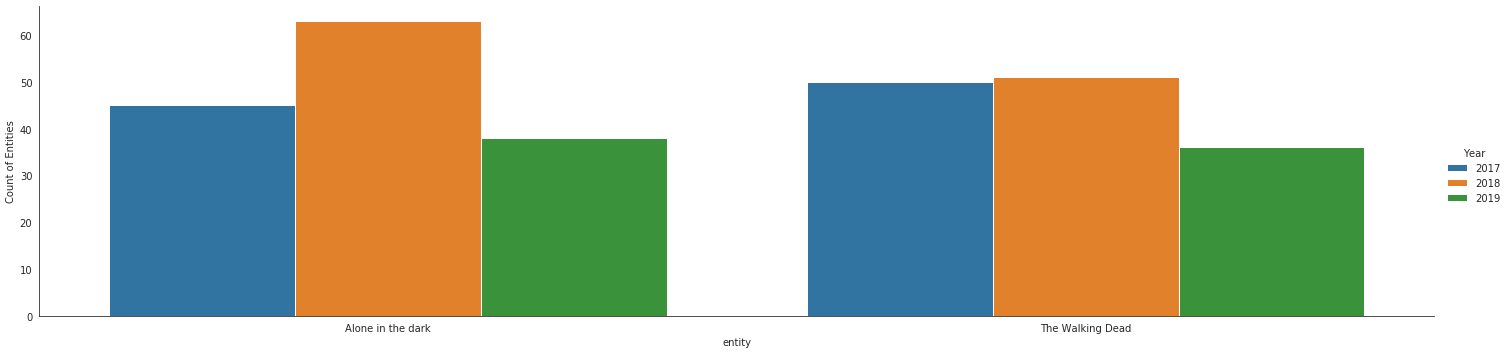

In [87]:
with sns.axes_style('white'):
    g = sns.catplot("entity", data=entity_count, aspect=4.0, kind='count',
                       hue='Year')
    g.set_ylabels('Count of Entities')

The above plot shows the purchase of books with respect to each year. It can be obserced that book Alone in the dark made highest purchase in year 2018.

In [98]:
grouped=df_m1.groupby(['entity','formattype','todate'])['totalrevenue'].sum()
type(grouped)

pandas.core.series.Series

### TIME SERIES ANALYSIS
As the data is based on time series, I took out time series of the 2 books with respect to their format. All together I can extract 6 times series below:

In [103]:
TS_alone_in_the_dark_audio=grouped['Alone in the dark']['audio'].reset_index()
TS_alone_in_the_dark_print=grouped['Alone in the dark']['print'].reset_index()
TS_alone_in_the_dark_ebook=grouped['Alone in the dark']['ebook'].reset_index()
TS_The_Walking_Dead_audio=grouped['The Walking Dead']['audio'].reset_index()
TS_The_Walking_Dead_print=grouped['The Walking Dead']['print'].reset_index()
TS_The_Walking_Dead_ebook=grouped['The Walking Dead']['ebook'].reset_index()

In [104]:
ts_dict = {'TS_alone_in_the_dark_audio':TS_alone_in_the_dark_audio,
       'TS_alone_in_the_dark_print':TS_alone_in_the_dark_print,
       'TS_alone_in_the_dark_ebook':TS_alone_in_the_dark_ebook,
        'TS_The_Walking_Dead_audio': TS_The_Walking_Dead_audio,
       'TS_The_Walking_Dead_print': TS_The_Walking_Dead_print,
       'TS_The_Walking_Dead_ebook': TS_The_Walking_Dead_ebook
      }

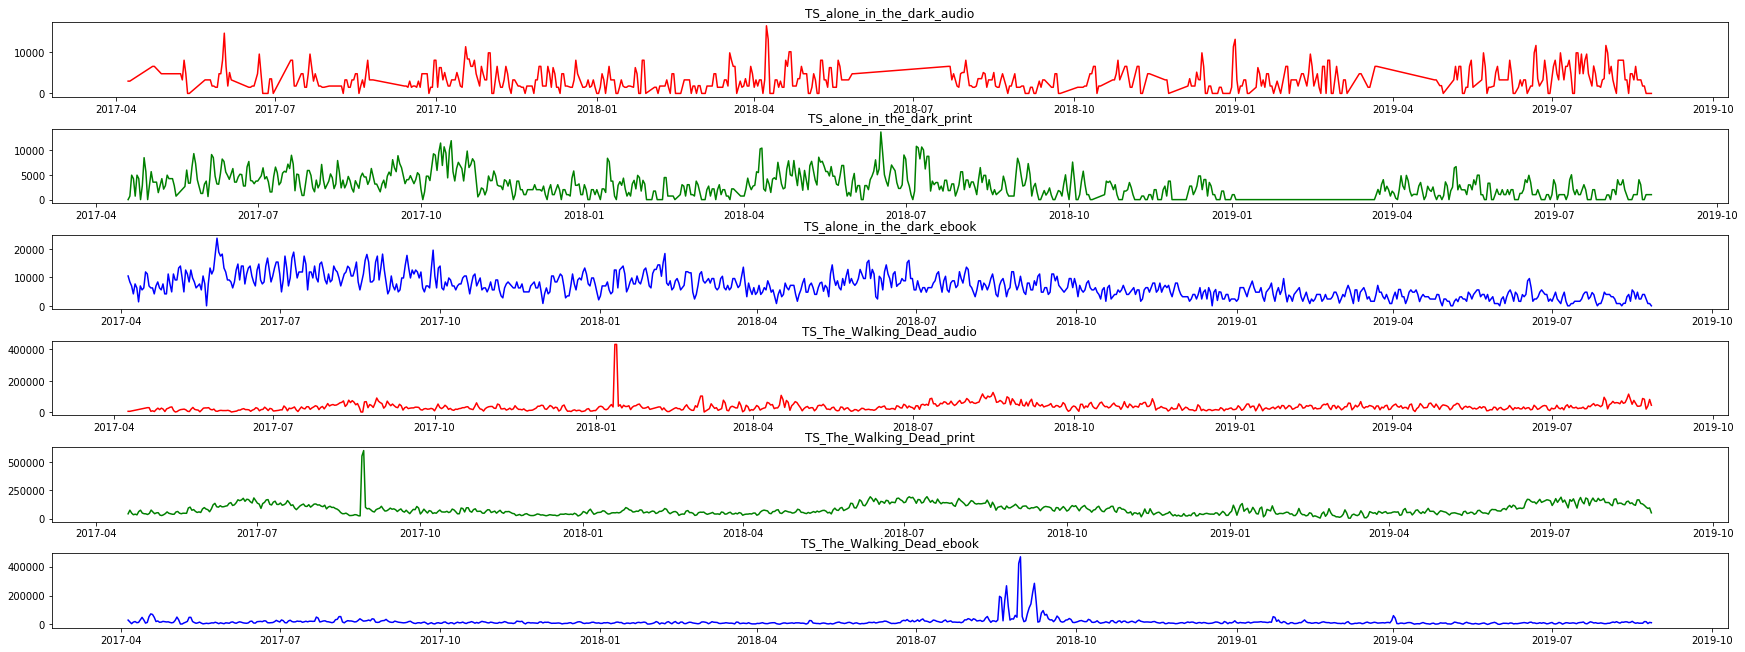

In [105]:
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 24                          
fig_size[1] = 9
k=list(ts_dict.keys())
col=['red', 'green', 'blue','red', 'green', 'blue']
fig,axs = plt.subplots(6,1)
fig.tight_layout() 
plt.subplots_adjust()
list
for i in range(0,6):
    axs[i].plot(ts_dict[k[i]].todate, ts_dict[k[i]]['totalrevenue'], color=col[i])
    axs[i].set_title(k[i])


Above there 6 times serieswhich shows revenue from 2017-4 to 2019-10 of 2 books with different format type. I have observed 
the following from the time series. 
Generally I can observed the trends. For example: The highest revenue was earned between 2017-09 by "The WalkingDead print version".
 Next highest revenue was earned by "The Walking ebook" version in 2018-10 and by "Walking Dead Audio" version 2018-01.


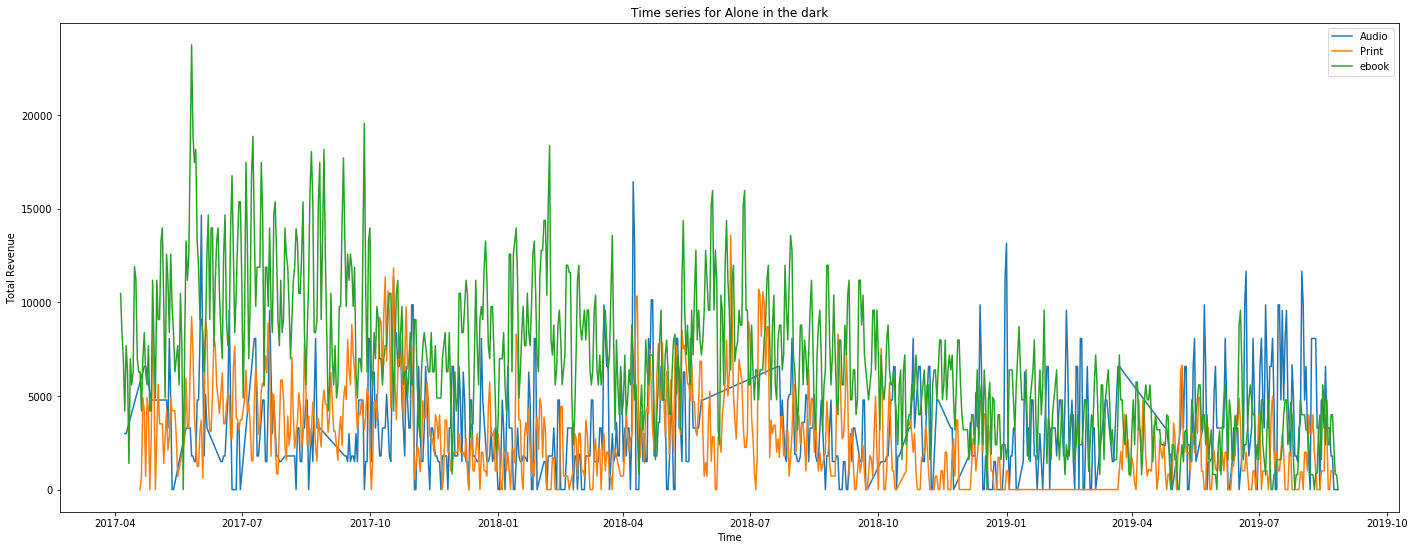

In [106]:
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 24                          
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.plot(TS_alone_in_the_dark_audio['todate'],TS_alone_in_the_dark_audio['totalrevenue'],label='Audio')
plt.plot(TS_alone_in_the_dark_print['todate'],TS_alone_in_the_dark_print['totalrevenue'], label='Print')
plt.plot(TS_alone_in_the_dark_ebook['todate'],TS_alone_in_the_dark_ebook['totalrevenue'], label='ebook')
plt.xlabel('Time')
plt.title('Time series for Alone in the dark')
plt.ylabel('Total Revenue')
plt.legend()

For "Alone in the dark" I can see 
1. Increase in revenue followed by decrease, then increase and later decrease in the ebook revenue.
2. Highest revenue earned is by ebook in between 2017-4 to 2017-07.
3. For the year 2017 ebook earned highest revenue.
4. In year 2019 it seems like Audio book generated higher revenue and then ebook and then print.

In [107]:
#def TS_plot(title,ts):
#    fig_size = plt.rcParams["figure.figsize"] 
#    fig_size[0] = 24                          
#    fig_size[1] = 9
#    plt.rcParams["figure.figsize"] = fig_size
#    plt.plot(ts['todate'],ts['totalrevenue'])
#    plt.xlabel('Time')
#    plt.title(title)
#    plt.ylabel('Total Revenue')


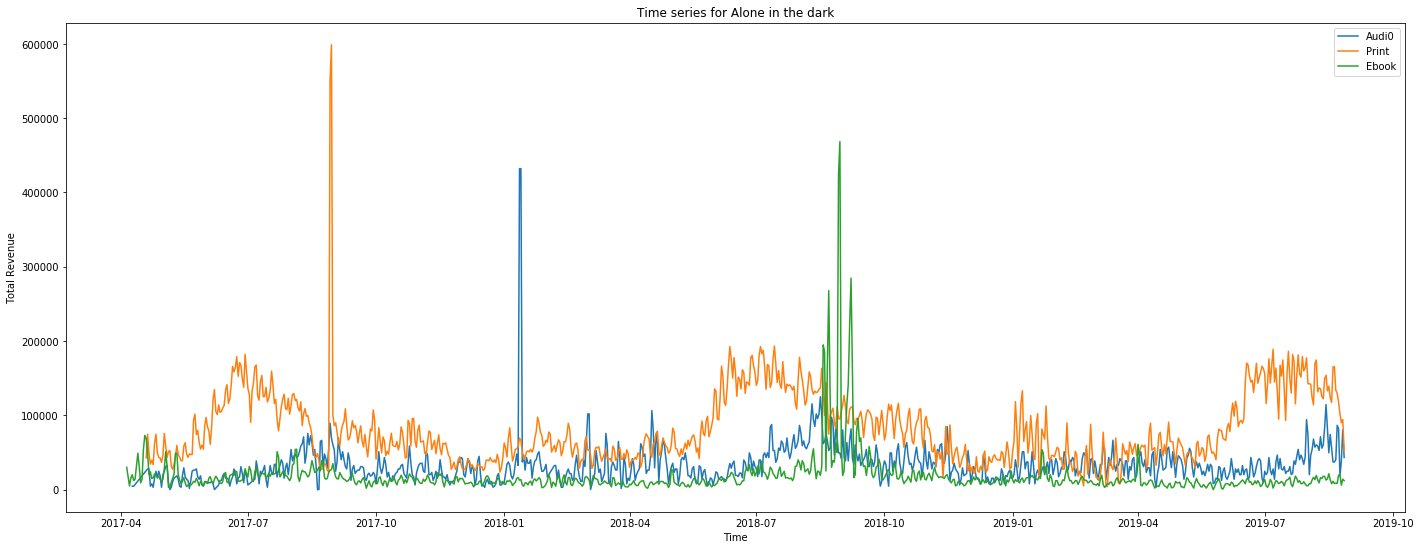

In [108]:
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 24                          
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.plot(TS_The_Walking_Dead_audio['todate'],TS_The_Walking_Dead_audio['totalrevenue'], label='Audi0')
plt.plot(TS_The_Walking_Dead_print['todate'],TS_The_Walking_Dead_print['totalrevenue'], label='Print')
plt.plot(TS_The_Walking_Dead_ebook['todate'],TS_The_Walking_Dead_ebook['totalrevenue'],label='Ebook')
plt.xlabel('Time')
plt.title('Time series for Alone in the dark')
plt.ylabel('Total Revenue')
plt.legend()

For The Walking Dead I have observed:
1. Highest Revenue for Print was generated aound 2017-09.
2. Highest Revenue for Audio was generated in 2018-01.
3. Highes Revenue for Ebook was generated in between 2018-8 to 2018-10.
4. In 2019 the popular version of book is found to be Print.

To analyse the revenue over the period of time I have plotted the time series analysis of each book with respect to its format 
type.

### Models: AR, MA, ARIMA

I will first create a model for time series "Alond in the dark ebook"  TS_alone_in_the_dark_ebook. I will find which time series model Either AR model MA model or ARIMA model is suitable. I will also find the order of model. The same procedure can be applied to other time series.

In [109]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from pandas import read_csv
from matplotlib import pyplot

In [110]:
import warnings
warnings.filterwarnings('ignore')

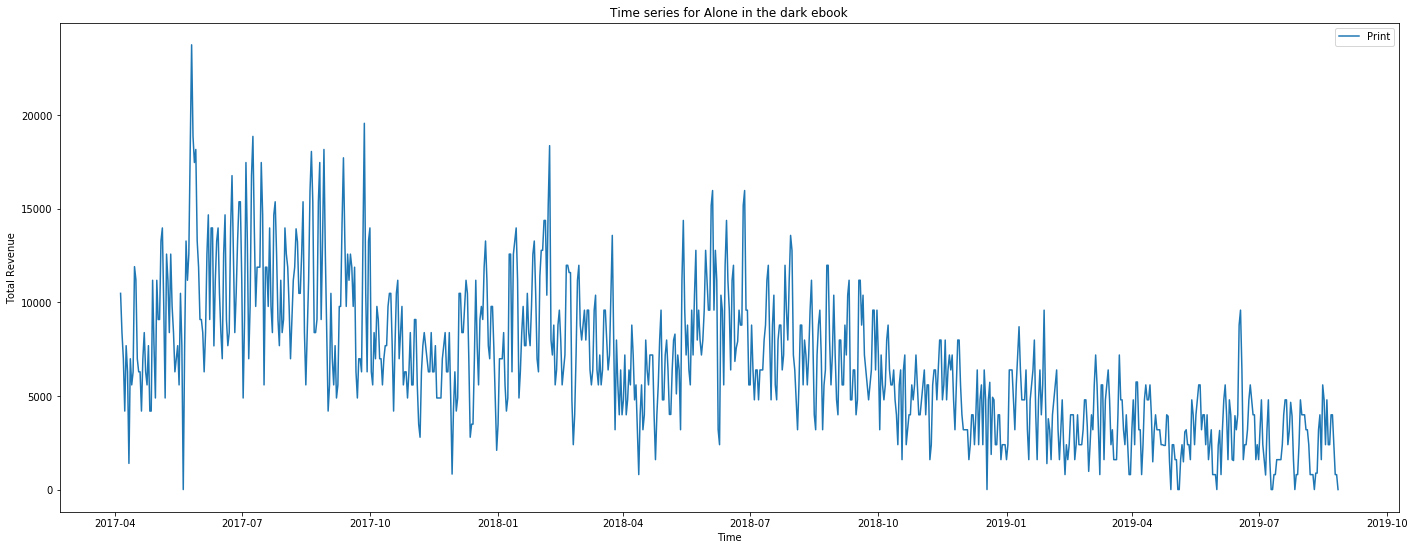

In [111]:
#TS_alone_in_the_dark_print['totalrevenue'].values
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 24                          
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.plot(TS_alone_in_the_dark_ebook['todate'],TS_alone_in_the_dark_ebook['totalrevenue'], label='Print')
plt.xlabel('Time')
plt.title('Time series for Alone in the dark ebook')
plt.ylabel('Total Revenue')
plt.legend()

First I am considering time series alone in the darl for print. I have again plotted it to observed. The first question that
needs to be asked if this time series is stationary or not? If the time series is stationary I will use either AR(p) or MA(q).
If it is not stationary I will use ARIMA model. By observing the data I think it is non stationary. I will use a statistical test Augmented Duckey Fuller test to determine if my observation is correct.

#### Test for Stationarity in Time Series

In [113]:
X = TS_alone_in_the_dark_ebook['totalrevenue'].values
from statsmodels.tsa.stattools import adfuller
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.463533
p-value: 0.551468
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


I can accept my hypothesis that time series is not staionary because the test shows that p value 0.55 is higher than the threshold value(0.05) to reject the null hypothesis. Therefore, I consider it non stationary series. As the data is not statioanry I will use ARIMA model. Next I will built ARIMA modle and try to fidn the order.

In [114]:
model = ARIMA(X, order=(3,1,2))
model_fit1 = model.fit(disp=0)
residuals = pd.DataFrame(model_fit1.resid)
#residuals.plot()
#pyplot.title('ARIMA fit Residuals with p=2, d=1, q=2 for (Time series for Alone in the dark)')
#pyplot.show()

In this step I am building an ARIMA model with order p, q and d. I can change the order of p, q and d. I have also plotted the
residuals. Now I am going to try a different order of ARIMA model.

In [115]:
#plot_acf(residuals)
#plot_pacf(residuals)
#pyplot.show()

In [116]:
model = ARIMA(X, order=(3,1,3))
model_fit2 = model.fit(disp=0)
residuals = pd.DataFrame(model_fit2.resid)
#residuals.plot()
#pyplot.title('ARIMA fit Residuals p=3, d=1, q=3 for (Time series for Alone in the dark)')
#pyplot.ylabel('Reveneu')
#pyplot.show()

Now the question is which order of model is optimum. There are differnt ways to find. I am here using AIC value to find the 
optimum model. 

In [117]:
from statsmodels.tsa.arima_model import ARMAResults 

In [118]:
print(ARMAResults.summary(model_fit1))


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  874
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -7887.398
Method:                       css-mle   S.D. of innovations           2000.725
Date:                Tue, 05 May 2020   AIC                          15788.795
Time:                        00:07:41   BIC                          15822.207
Sample:                             1   HQIC                         15801.577
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4659      8.195     -0.789      0.430     -22.527       9.596
ar.L1.D.y     -0.0943      0.037     -2.562      0.010      -0.166      -0.022
ar.L2.D.y      0.0306      0.037      0.821      0.4

In the summary the AIC value is found to be 15788 for p=2,d=1,q=2.

In [119]:
print(ARMAResults.summary(model_fit2))

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  874
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -7887.299
Method:                       css-mle   S.D. of innovations           2000.514
Date:                Tue, 05 May 2020   AIC                          15790.598
Time:                        00:07:42   BIC                          15828.783
Sample:                             1   HQIC                         15805.205
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5119      8.092     -0.805      0.421     -22.372       9.348
ar.L1.D.y      0.1598      0.493      0.324      0.746      -0.806       1.125
ar.L2.D.y      0.0560      0.060      0.940      0.3

In the summary the AIC value is found to be 15790 for p=3,d=1,q=3. As AIC for model with p=2,d=1,q=2 is small we will select 
the model p=2, d=1, q=2.

### Finding Out the optimum model using Cross-Validation

In [120]:
Actual=TS_alone_in_the_dark_ebook['totalrevenue'].values[0:875]
Actual_index=TS_alone_in_the_dark_ebook['todate'].values[0:875]
train = TS_alone_in_the_dark_ebook['totalrevenue'].values[0:600]
train_index=TS_alone_in_the_dark_ebook['todate'].values[0:600]
test = TS_alone_in_the_dark_ebook['totalrevenue'].values[600:]
test_index = TS_alone_in_the_dark_ebook['todate'].values[600:]

In [121]:
model1 = ARIMA(train, order=(3, 1, 0))  
fitted = model1.fit(disp=-1)

In [122]:
print(ARMAResults.summary(fitted))

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  599
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -5565.311
Method:                       css-mle   S.D. of innovations           2621.695
Date:                Tue, 05 May 2020   AIC                          11140.621
Time:                        00:07:51   BIC                          11162.598
Sample:                             1   HQIC                         11149.177
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9296     68.656     -0.115      0.908    -142.494     126.634
ar.L1.D.y     -0.0769      0.041     -1.879      0.060      -0.157       0.003
ar.L2.D.y     -0.5006      0.035    -14.124      0.0

In [123]:
fc, se, conf = fitted.forecast(275, alpha=0.05)
fc_series = pd.Series(fc, index=test_index)
lower_series = pd.Series(conf[:, 0], index=test_index)
upper_series = pd.Series(conf[:, 1], index=test_index)

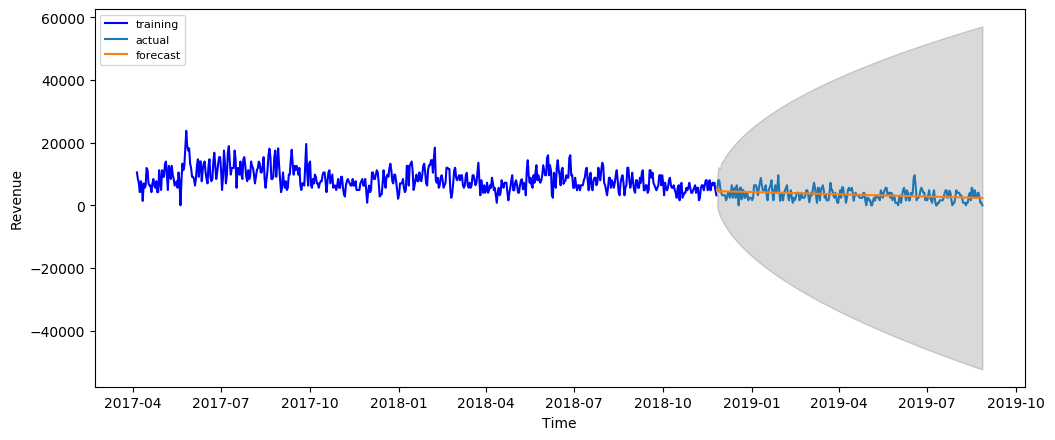

In [124]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_index,train, label='training', color='blue')
plt.plot(test_index,test,label='actual')
plt.plot(test_index,fc_series, label='forecast' )
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend(loc='upper left', fontsize=8)
plt.show()

This model gives a directionally correct forecast. But still I feel there is room for improvement. I will also find out the
AIC value of the model from the model summary. AIC value is 11140.621. 

In [125]:
model2 = ARIMA(train, order=(2, 2, 1))  
fitted = model2.fit(disp=-1)

In [126]:
print(ARMAResults.summary(fitted))

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  598
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -5560.241
Method:                       css-mle   S.D. of innovations           2624.289
Date:                Tue, 05 May 2020   AIC                          11130.482
Time:                        00:07:55   BIC                          11152.450
Sample:                             2   HQIC                         11139.035
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0501      0.393     -0.128      0.898      -0.820       0.719
ar.L1.D2.y    -0.0839      0.035     -2.373      0.018      -0.153      -0.015
ar.L2.D2.y    -0.5011      0.035    -14.192      0.0

In [127]:
fc, se, conf = fitted.forecast(275, alpha=0.05)
fc_series = pd.Series(fc, index=test_index)
lower_series = pd.Series(conf[:, 0], index=test_index)
upper_series = pd.Series(conf[:, 1], index=test_index)

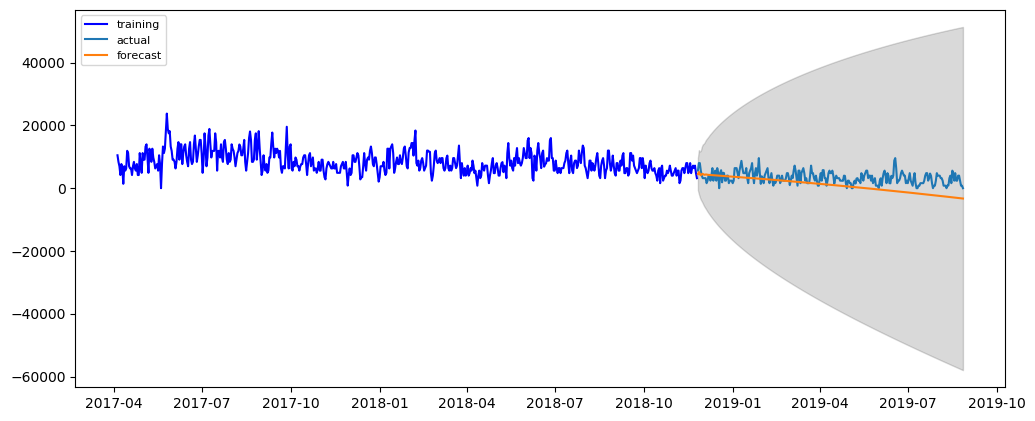

In [128]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_index,train, label='training', color='blue')
plt.plot(test_index,test,label='actual')
plt.plot(test_index,fc_series, label='forecast' )
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.legend(loc='upper left', fontsize=8)
plt.show()

This model is not capturing the accurate direction of data. It is giving negative values as well. It is unable to find the 
right trend.

In [129]:
model3 = ARIMA(train, order=(4, 1, 1))  
fitted = model3.fit(disp=-1)

In [130]:
print(ARMAResults.summary(fitted))

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  599
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -5509.086
Method:                       css-mle   S.D. of innovations           2379.193
Date:                Tue, 05 May 2020   AIC                          11032.173
Time:                        00:08:00   BIC                          11062.940
Sample:                             1   HQIC                         11044.151
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.9661     62.216     -0.112      0.911    -128.907     114.974
ar.L1.D.y     -0.8943      0.041    -22.021      0.000      -0.974      -0.815
ar.L2.D.y     -0.6538      0.052    -12.603      0.0

In [131]:
fc, se, conf = fitted.forecast(275, alpha=0.05)
fc_series = pd.Series(fc, index=test_index)
lower_series = pd.Series(conf[:, 0], index=test_index)
upper_series = pd.Series(conf[:, 1], index=test_index)

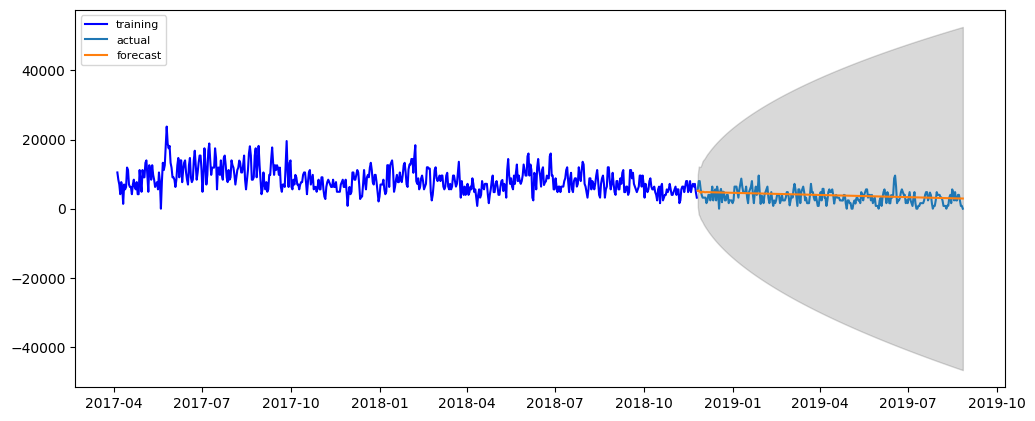

In [132]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_index,train, label='training', color='blue')
plt.plot(test_index,test,label='actual')
plt.plot(test_index,fc_series, label='forecast' )
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.legend(loc='upper left', fontsize=8)
plt.show()

Out of all the above models this model with p=4, d=1, q=1 is giving a good estimate of correct direction forecast and also its 
AIC values is lower among all i.e: 11032.173. 


In the same way I can built model for other time series that I have found. So lets forecast company's total revenue. 

In [133]:
df_rev=df_m1[df_m1['publisherparent'].str.contains("Simon & Schuster")]
df_rev =df_rev.set_index('todate')
df_rev.tail()

,entity,formattype,fromdate,titlecount,author,amazontotalreviews,minappleprice,amazontotalrevenue,accruedpreordersoldunits,preordersalesrevenue,...,preorderrevenue,pubtrackreported,lumpedpreorderrevenue,amazonsoldunits,amazonpreordersalesrevenue,maxappleprice,pagelength,pricewassetbypublisher,barnesandnobledistributor,appledistributor
todate,,,,,,,,,,,,,,,,,,,,,
2019-08-23,The Walking Dead,audio,2019-08-22,1,Matthew Murdock,275.0,0,81835,0,0,...,0,1,0,25,0,0,395.0,NaN,NaN,NaN
2019-08-24,The Walking Dead,audio,2019-08-23,1,Matthew Murdock,275.0,0,18460,0,0,...,0,1,0,5,0,0,395.0,NaN,NaN,NaN
2019-08-25,The Walking Dead,audio,2019-08-24,1,Matthew Murdock,275.0,0,38623,0,0,...,0,1,0,12,0,0,395.0,NaN,NaN,NaN
2019-08-26,The Walking Dead,audio,2019-08-25,1,Matthew Murdock,275.0,0,80340,0,0,...,0,1,0,25,0,0,395.0,NaN,NaN,NaN
2019-08-27,The Walking Dead,audio,2019-08-26,1,Matthew Murdock,275.0,0,43212,0,0,...,0,1,0,13,0,0,395.0,NaN,NaN,NaN


In [134]:
#average revenue for months based on entity:
TS_rev = df_rev['totalrevenue'].resample('MS').mean()
#TS_rev=TS_rev.reset_index()

TS_rev


todate
2017-04-01    17641.452632
2017-05-01    18001.534091
2017-06-01    24639.817757
2017-07-01    29045.850000
2017-08-01    30261.399038
2017-09-01    20314.926108
2017-10-01    17164.796380
2017-11-01    13248.792208
2017-12-01    10178.643478
2018-01-01    18722.591489
2018-02-01    14001.924242
2018-03-01    13854.420814
2018-04-01    13719.264822
2018-05-01    13901.817829
2018-06-01    26775.158590
2018-07-01    28918.100775
2018-08-01    37939.872428
2018-09-01    27664.678261
2018-10-01    22173.231481
2018-11-01    12560.775194
2018-12-01     8090.334507
2019-01-01    14895.531496
2019-02-01    11761.343891
2019-03-01    11307.252101
2019-04-01    13245.938776
2019-05-01    11444.924242
2019-06-01    20409.722689
2019-07-01    28880.601810
2019-08-01    30420.716578
Freq: MS, Name: totalrevenue, dtype: float64

Text(0, 0.5, 'Total Revenue')

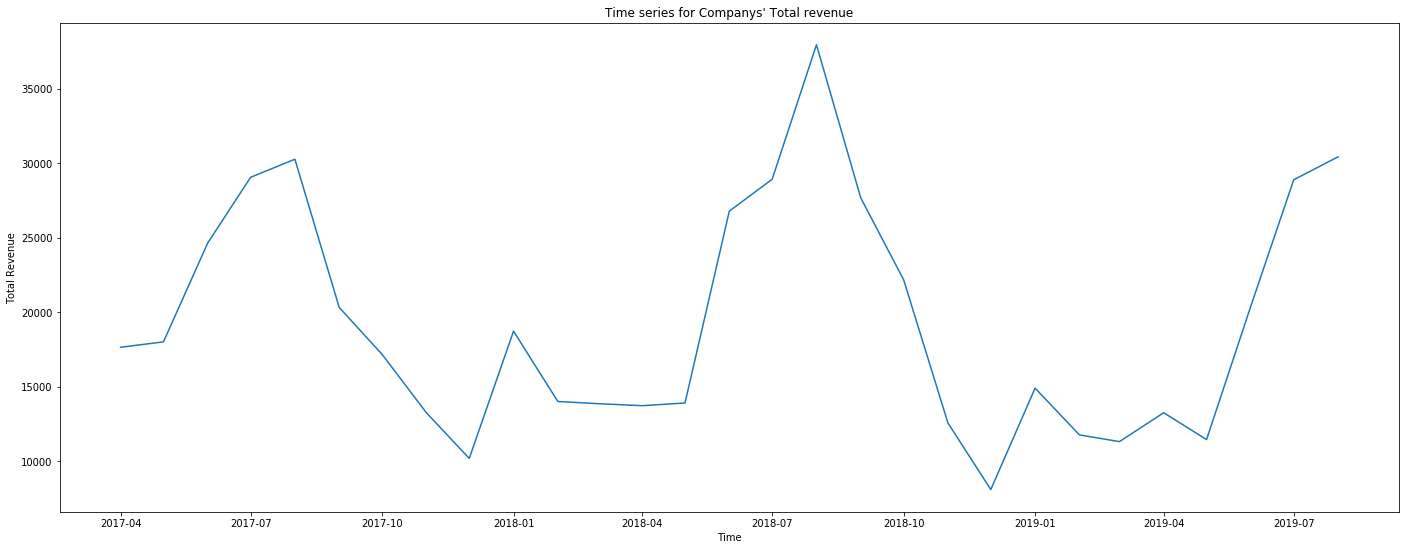

In [135]:
#TS_alone_in_the_dark_print['totalrevenue'].values
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 24                          
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
#plt.plot(TS_rev['todate'],TS_rev['totalrevenue'])
plt.plot(TS_rev)
plt.xlabel('Time')
plt.title("Time series for Companys' Total revenue")
plt.ylabel('Total Revenue')
#plt.legend()

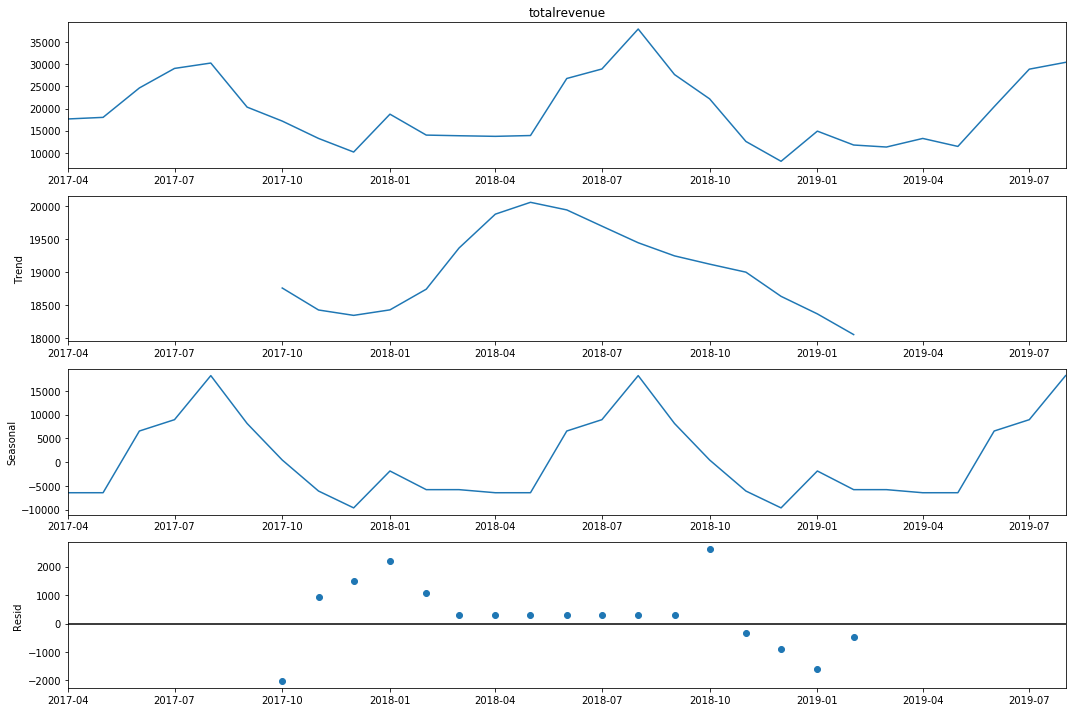

In [136]:
rcParams['figure.figsize']=15,10
d = sm.tsa.seasonal_decompose(TS_rev, model ='additive')
fig = d.plot()

In [137]:
TS_rev=TS_rev.reset_index()
Actual=TS_rev['totalrevenue'].values[0:28]
Actual_index=TS_rev['todate'].values[0:28]
train = TS_rev['totalrevenue'].values[0:25]
train_index=TS_rev['todate'].values[0:25]
test = TS_rev['totalrevenue'].values[25:]
test_index = TS_rev['todate'].values[25:]
#test

In [138]:
model1 = ARIMA(train, order=(2,0,2))  
fitted = model1.fit(disp=-1)

In [139]:
fc, se, conf = fitted.forecast(4, alpha=0.05)
fc_series = pd.Series(fc, index=test_index)
lower_series = pd.Series(conf[:, 0], index=test_index)
upper_series = pd.Series(conf[:, 1], index=test_index)

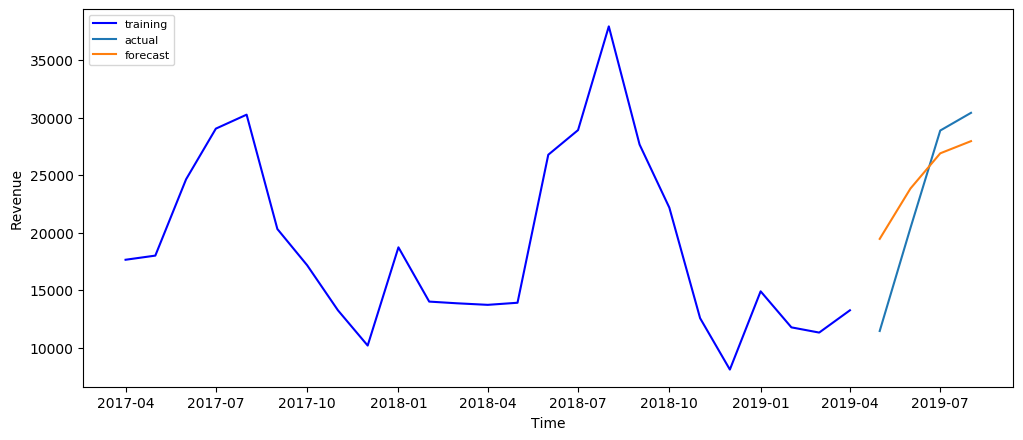

In [140]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_index,train, label='training', color='blue')
plt.plot(test_index,test,label='actual')
plt.plot(test_index,fc_series, label='forecast' )
#plt.fill_between(lower_series.index, lower_series, upper_series, 
#                 color='k', alpha=.15)
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [143]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    acc=(1-mape)*100
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,  
            'corr':corr, 'minmax':minmax, 'accuracy':acc})

forecast_accuracy(fc, test)


{'mape': 0.25441299244567983,
 'me': 1749.0635948177355,
 'mae': 3971.3910878355587,
 'mpe': 0.17962294514325486,
 'rmse': 4635.395651683877,
 'corr': 0.997391835965756,
 'minmax': 0.17629923169657835,
 'accuracy': 74.55870075543201}

In [145]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from pmdarima.arima import StepwiseContext
#from pyramid.arima import auto_arima
with StepwiseContext(max_dur=2):
    model = pm.auto_arima(train, stepwise=True, error_action='ignore', seasonal=True)

In [146]:
model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [147]:
model.aic()

502.81053627438286

In [148]:
#future_forecast = model.predict(n_periods=37)
#future_forecast
model.predict(4)
fc_series = pd.Series(fc, index=test_index)
lower_series = pd.Series(conf[:, 0], index=test_index)
upper_series = pd.Series(conf[:, 1], index=test_index)

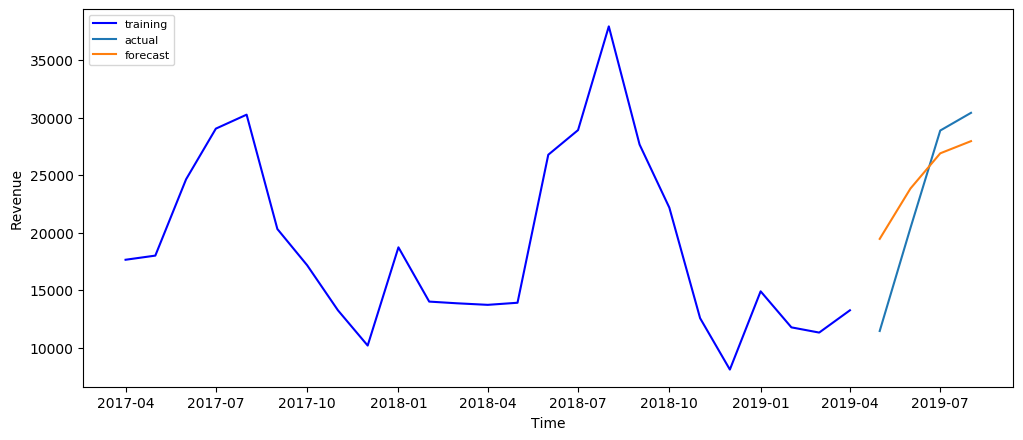

In [149]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_index,train, label='training', color='blue')
plt.plot(test_index,test,label='actual')
plt.plot(test_index,fc_series, label='forecast' )
#plt.fill_between(lower_series.index, lower_series, upper_series, 
#                 color='k', alpha=.15)
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [150]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    acc=(1-mape)*100
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,  
            'corr':corr, 'minmax':minmax, 'accuracy':acc})

forecast_accuracy(fc, test)


{'mape': 0.25441299244567983,
 'me': 1749.0635948177355,
 'mae': 3971.3910878355587,
 'mpe': 0.17962294514325486,
 'rmse': 4635.395651683877,
 'corr': 0.997391835965756,
 'minmax': 0.17629923169657835,
 'accuracy': 74.55870075543201}

The model is able to forecast the right direction of total sales revenue with 75% accuracy

### Conclusion
I had a dataset of compnay Simon and Schuster that contains information about the sale of the entities/books. I have started with data cleaning, missing values filling, followed by data expolaration using data visualization. Found some interesting insights such as most sold entity in year 2017 is 'Alone in the dark'. Afterwards, I have also used ARIMA model to forecast time series of revenue.